In [10]:

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from Segment import *

In [11]:
def generateRandomPoints(numberOfPoints: int):
  points = []
  for i in range(numberOfPoints):
    x = rd.randint(0, 10)
    y = rd.randint(0, 10)
    point = Point(x, y)
    points.append(point)
  return points

In [12]:
def getCenters(nbCluster : int, points):
  listlen = len(points)
  setM = set()
  res = []
  for _ in range(nbCluster):
    randomIndex = rd.randint(0, listlen - 1)
    while randomIndex in setM:
      randomIndex = rd.randint(0, listlen - 1)
    setM.add(randomIndex)
    res.append(points[randomIndex])
  return res    


In [13]:
def distance(point1, point2):
  return (point1.get_x() - point2.get_x())**2 + (point1.get_y() - point2.get_y())**2

In [14]:
def generateMedoid(centers, points):
  res = {center : [(center, 0)] for center in centers}
  for point in points:
    if point in res:
      continue
    distFromCenter = np.Inf
    associatedCenter = None
    for center in centers:
      dist = distance(point, center)
      if dist < distFromCenter:
        distFromCenter = dist
        associatedCenter = center
    res[associatedCenter].append((point, distFromCenter))
  return res  

In [15]:
def cost(medoids):
  res = 0
  for medoid in medoids:
    for i in range(len(medoids[medoid])):
      res += medoids[medoid][i][1]
  return res 

In [16]:
def kMedoids(nbCluster, points):
  centers = getCenters(nbCluster, points)
  medoids = generateMedoid(centers, points)
  currentCost = cost(medoids)
  res = medoids
  for center in centers:
    for point in points:
      newCenters = [x if x != center else point for x in centers]
      newMedoids = generateMedoid(newCenters, points)
      newCost = cost(newMedoids)
      if newCost < currentCost:
        currentCost = newCost
        res = newMedoids
  return res   

In [17]:
def printMedoids(medoids):
  for medoid in medoids:
    print(medoid, end=": ")
    for point in medoids[medoid]:
      print(point[0], point[1], end=' ')
    print()

(9, 4): (9, 4) 0 (7, 3) 5 (8, 1) 10 (8, 0) 17 (9, 7) 9 (9, 3) 1 (9, 8) 16 (10, 10) 37 (9, 6) 4 (10, 0) 17 (9, 6) 4 (8, 3) 2 (7, 1) 13 (9, 1) 9 (10, 10) 37 (10, 5) 2 
(3, 1): (3, 1) 0 (4, 0) 2 (0, 1) 9 (0, 0) 10 (5, 2) 5 (6, 0) 10 (0, 2) 10 (1, 2) 5 (5, 1) 4 (0, 3) 13 (0, 3) 13 (1, 2) 5 (4, 0) 2 (0, 1) 9 
(4, 5): (4, 5) 0 (1, 9) 25 (5, 10) 26 (5, 8) 10 (5, 7) 5 (5, 6) 2 (1, 10) 34 (7, 9) 25 (4, 7) 4 (1, 5) 9 (0, 6) 17 (5, 9) 17 (2, 9) 20 (3, 9) 17 (4, 3) 4 (2, 5) 4 (2, 5) 4 (4, 7) 4 (4, 9) 16 
523


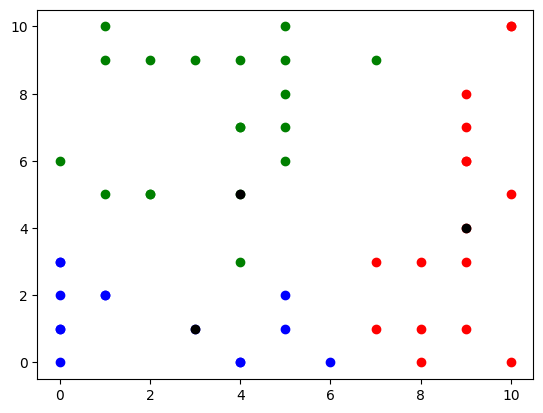

In [18]:
list = generateRandomPoints(50)
# print("List of points")
# res = ""
# for point in list: 
#   res += point.__str__()
#   res += " "
# print(res)
# print("List of centers")
# centers = getCenters(4, list)
# for m in centers:
#   m.printPoint() 
# print("Test distance")
# print(distance(centers[0], list[0]))
# print("Test get medoids")
# medoids = generateMedoid(centers, list)
# printMedoids(medoids)
# print(cost(medoids))
# print("Test k-medoids")
km = kMedoids(3, list)
printMedoids(km) 
print(cost(km))
colors = ['red', 'blue', 'green']
i = 0
for m in km:
  X = [point[0].get_x() for point in km[m]]
  Y = [point[0].get_y() for point in km[m]]
  plt.scatter(X, Y, c=colors[i])
  plt.scatter(m.get_x(), m.get_y(), c='black')
  i += 1